In [153]:
import pandas as pd
import numpy as np

In [154]:
y = [25.9,29.5,27.9,25.9,29.9,29.9,30.9,28.9,35.9,31.5,31.0,30.9,30.0,36.9,41.9,40.5,43.9,37.5,37.9,44.5,37.9,38.9,36.9,45.8]
x1 = [4.9176,5.0208,4.5429,4.5573,5.0597,3.8910,5.8980,5.6039,5.8282,5.3003,6.2712,5.9592,5.0500,8.2464,6.6969,7.7841,9.0384,5.9894,7.5422,8.7951,6.0831,8.3607,8.1400,9.1416]
x2 = [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.5,1.5,1.5,1.0,1.0,1.5,1.5,1.5,1.5,1.0,1.5]
x3 = [3.4720,3.5310,2.2750,4.0500,4.4550,4.4550,5.8500,9.5200,6.4350,4.9883,5.5200,6.6660,5.0000,5.1500,6.9020,7.1020,7.8000,5.5200,5.0000,9.8900,6.7265,9.1500,8.0000,7.3262]
x4 = [0.9980,1.5000,1.1750,1.2320,1.1210,0.9880,1.2400,1.5010,1.2250,1.5520,0.9750,1.1210,1.0200,1.6640,1.4880,1.3760,1.5000,1.2560,1.6900,1.8200,1.6520,1.7770,1.5040,1.8310]
x5 = [1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,2.0,0.0,2.0,1.5,1.0,1.5,2.0,1.0,2.0,1.0,2.0,2.0,1.5]
df = pd.DataFrame({
    'y': y,
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'x4': x4,
    'x5': x5
})
df_sampled = df.sample(n=14, random_state=42)
df_sampled

,y,x1,x2,x3,x4,x5
8,35.9,5.8282,1.0,6.4350,1.225,2.0
16,43.9,9.0384,1.0,7.8000,1.500,1.5
0,25.9,4.9176,1.0,3.4720,0.998,1.0
18,37.9,7.5422,1.5,5.0000,1.690,1.0
11,30.9,5.9592,1.0,6.6660,1.121,2.0
9,31.5,5.3003,1.0,4.9883,1.552,1.0
13,36.9,8.2464,1.5,5.1500,1.664,2.0
1,29.5,5.0208,1.0,3.5310,1.500,2.0
21,38.9,8.3607,1.5,9.1500,1.777,2.0
5,29.9,3.8910,1.0,4.4550,0.988,1.0


### Part A. All possible regression

Full Model

In [155]:
y = df_sampled['y'].values.copy()
y_bar = np.mean(y)
regressors = ["x1", "x2", "x3", "x4", "x5"]

# Full model
X_full = df_sampled[regressors].values.copy()
X_full = np.column_stack((np.ones(X_full.shape[0]), X_full))

beta = np.linalg.pinv(X_full.T @ X_full) @ X_full.T @ y
y_pred_full = X_full @ beta

sst_full = np.sum((y - y_bar) ** 2)
ssr_full = np.sum((y_pred_full - y_bar) ** 2)
sse_full = np.sum((y - y_pred_full) ** 2)
mse_full = sse_full / (len(y) - X_full.shape[1])

r2_full = 1 - (sse_full / sst_full)
adj_r2_full = 1 - (1 - r2_full) * (len(y) - 1) / (len(y) - X_full.shape[1] - 1)
aic_full = len(y) * np.log(sse_full / len(y)) + 2 * X_full.shape[1]
bic_full = len(y) * np.log(sse_full / len(y)) + np.log(len(y)) * X_full.shape[1]

print("Full Model")
print(f"SST: {sst_full:.4f}")
print(f"SSR: {ssr_full:.4f}")
print(f"SSE: {sse_full:.4f}")
print(f"MSE: {mse_full:.4f}")
print(f"R²: {r2_full:.4f}")
print(f"Adjusted R²: {adj_r2_full:.4f}")
print(f"AIC: {aic_full:.4f}")
print(f"BIC: {bic_full:.4f}")

Full Model
SST: 420.9750
SSR: 366.7376
SSE: 54.2374
MSE: 6.7797
R²: 0.8712
Adjusted R²: 0.7607
AIC: 30.9604
BIC: 34.7947


Subset Models Evaluation

In [156]:
from itertools import combinations

# All possible regressions
model_evaluations = {}

y = df_sampled['y'].values.copy()
y_bar = np.mean(y)

for i in range(1, len(regressors)+1):
    iter_combos = combinations(regressors, r=i)
    for subset in iter_combos:

        X = df_sampled[list(subset)].values.copy()
        X = np.column_stack((np.ones(X.shape[0]), X))

        beta_hat = np.linalg.pinv(X.T @ X) @ X.T @ y
        y_pred = X @ beta_hat

        sst = np.sum((y - y_bar) ** 2)
        ssr = np.sum((y_pred - y_bar) ** 2)
        sse = np.sum((y - y_pred) ** 2)

        r2 = 1 - (sse / sst)
        adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
        aic = len(y) * np.log(sse / len(y)) + 2 * X.shape[1]
        bic = len(y) * np.log(sse / len(y)) + np.log(len(y)) * X.shape[1]
        cp = sse/mse_full - (len(y) - 2 * X.shape[1])
        model_evaluations[subset] = {
            'R2': r2,
            'Adj_R2': adj_r2,
            "Cp": cp,
            'AIC': aic,
            'BIC': bic
        }

df_subsets = pd.DataFrame(model_evaluations).T.reset_index().sort_values(by=['Adj_R2'], ascending=False)
df_subsets

,level_0,level_1,level_2,level_3,level_4,R2,Adj_R2,Cp,AIC,BIC
6,x1,x3,NaN,NaN,NaN,0.864894,0.824362,0.389240,25.625510,27.542682
0,x1,NaN,NaN,NaN,NaN,0.842430,0.813781,-0.215900,25.778832,27.056947
19,x1,x3,x5,NaN,NaN,0.869040,0.810835,2.131796,27.189157,29.745386
15,x1,x2,x3,NaN,NaN,0.865700,0.806011,2.339161,27.541690,30.097919
18,x1,x3,x4,NaN,NaN,0.864927,0.804895,2.387166,27.622050,30.178279
5,x1,x2,NaN,NaN,NaN,0.846020,0.799826,1.561173,27.456158,29.373330
7,x1,x4,NaN,NaN,NaN,0.844362,0.797670,1.664163,27.606156,29.523328
8,x1,x5,NaN,NaN,NaN,0.844105,0.797336,1.680118,27.629249,29.546421
26,x1,x2,x3,x5,NaN,0.870279,0.789203,4.054847,29.056049,32.251335
28,x1,x3,x4,x5,NaN,0.869277,0.787575,4.117084,29.163806,32.359093


### Part B. Stepwise Regression

In [157]:
import numpy as np
from itertools import combinations
from scipy import stats  # Only for t-distribution and p-values

def ols_fit(X, y):
    """Compute OLS regression coefficients using normal equations."""
    XTX_inv = np.linalg.pinv(X.T @ X)
    beta = XTX_inv @ X.T @ y
    y_hat = X @ beta
    residuals = y - y_hat
    n, p = X.shape
    sse = np.sum(residuals**2)
    mse = sse / (n - p)
    se = np.sqrt(np.diag(XTX_inv) * mse)
    t_stats = beta / se
    p_vals = 2 * (1 - stats.t.cdf(np.abs(t_stats), df=n - p))
    return beta, y_hat, residuals, sse, mse, se, t_stats, p_vals

def model_metrics(y, y_hat, p):
    """Compute R^2, adj R^2, AIC, and BIC."""
    n = len(y)
    rss = np.sum((y - y_hat)**2)
    tss = np.sum((y - np.mean(y))**2)
    r2 = 1 - (rss / tss)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    aic = n * np.log(rss / n) + 2 * p
    bic = n * np.log(rss / n) + np.log(n) * p
    return r2, adj_r2, aic, bic

def stepwise_selection(X, y, entry_threshold=0.10, removal_threshold=0.10):
    """
    Perform stepwise regression using forward and backward selection.
    X: predictor matrix (n x k)
    y: response vector (n,)
    Returns selected variable indices and final model summary.
    """
    n, k = X.shape
    predictors = list(range(k))
    selected = []
    changed = True

    while changed:
        changed = False
        
        # ---- Forward Step ----
        remaining = list(set(predictors) - set(selected))
        new_pval = pd.Series(index=remaining, dtype=float)
        for r in remaining:
            X_model = np.column_stack([np.ones(n), X[:, selected + [r]]])
            _, _, _, _, _, _, _, p_vals = ols_fit(X_model, y)
            new_pval[r] = p_vals[-1]  # p-value for newly added variable
        
        if not new_pval.empty:
            best_feature = new_pval.idxmin()
            if new_pval[best_feature] < entry_threshold:
                selected.append(best_feature)
                changed = True

        # ---- Backward Step ----
        if len(selected) > 0:
            X_model = np.column_stack([np.ones(n), X[:, selected]])
            _, _, _, _, _, _, _, p_vals = ols_fit(X_model, y)
            worst_pval = p_vals[1:].max()  # exclude intercept
            if worst_pval > removal_threshold:
                worst_feature = selected[np.argmax(p_vals[1:])]
                selected.remove(worst_feature)
                changed = True

    # Final Model
    X_final = np.column_stack([np.ones(n), X[:, selected]])
    beta, y_hat, resid, _, _, _, _, p_vals = ols_fit(X_final, y)
    r2, adj_r2, aic, bic = model_metrics(y, y_hat, len(selected) + 1)
    
    print("Selected variables:", list(np.array(regressors)[selected]))
    print(f"R2 = {r2:.4f}, Adjusted R2 = {adj_r2:.4f}, AIC = {aic:.2f}, BIC = {bic:.2f}")
    print("Coefficients (including intercept):", beta)
    
    return selected, beta, y_hat, resid, adj_r2, aic, bic

# Full model
X = df_sampled[regressors].values.copy()
y = df_sampled['y'].values.copy()

# Run stepwise selection
selected_vars, beta, y_hat, resid, adj_r2, aic, bic = stepwise_selection(X, y)

Selected variables: ['x1']
R2 = 0.8424, Adjusted R2 = 0.8138, AIC = 25.78, BIC = 27.06
Coefficients (including intercept): [14.30551165  3.08258497]


### Part C. Model Diagnostics for B 
### Part D. Residual plots for model adequacy

Residuals Plot (Constant Variance)

Text(0.5, 0, 'Predicted Values')

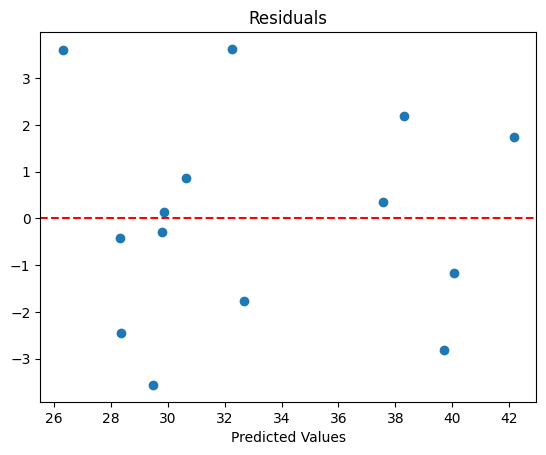

In [158]:
### Part C. Model Diagnostics for B
import matplotlib.pyplot as plt
# Residuals vs Fitted
plt.scatter(y_hat, resid)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals')
plt.xlabel('Predicted Values')

Predicted vs Actual (Linearity)

Text(0, 0.5, 'Actual Values')

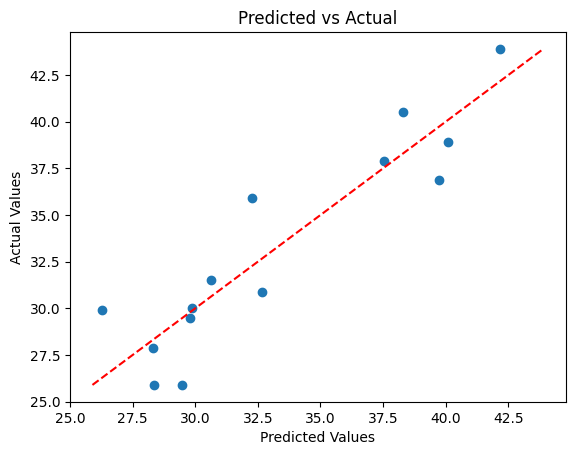

In [159]:
### Part C. Model Diagnostics for B
import matplotlib.pyplot as plt
# Predicted vs Actual
plt.scatter(y_hat, y)
# Add the 45-degree line of perfect agreement
min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
plt.title('Predicted vs Actual')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

Q-Q Plot (Normality of Residuals)

Text(0.5, 1.0, 'Q-Q Plot of Residuals')

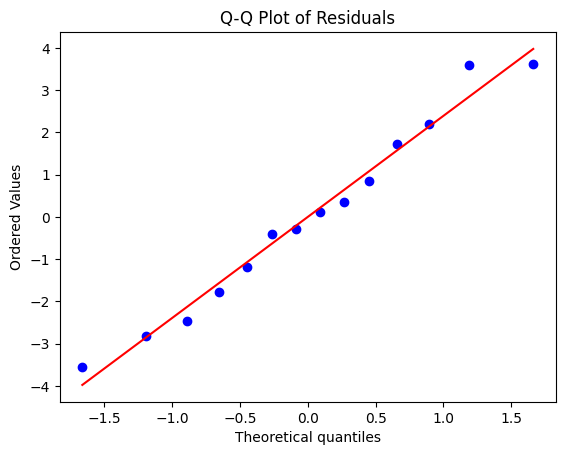

In [160]:
# Normal Q-Q Plot
import scipy.stats as stats
stats.probplot(resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

Multicollinearity Check

In [161]:
VIF = 1/(1-adj_r2)
print("Variance Inflation Factor (VIF):", VIF)

Variance Inflation Factor (VIF): 5.37001739826115


### Part E. Model Validation between A and B models

In [162]:
from sklearn.model_selection import train_test_split

model_A = ["x1", "x3"]
model_B = list(np.array(regressors)[selected_vars])

X = df_sampled.loc[:, df_sampled.columns != "y"].copy()
y = df_sampled["y"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

metric_dict = {}

for model, name in zip([model_A, model_B], ['Model A', 'Model B']):
    X_train_model = X_train[model].values
    X_test_model = X_test[model].values
    
    n_train = X_train_model.shape[0]
    n_test = X_test_model.shape[0]
    
    # Add intercept
    X_train_model = np.column_stack((np.ones(n_train), X_train_model))
    X_test_model = np.column_stack((np.ones(n_test), X_test_model))
    
    # Fit model on training data
    beta, y_hat_train, resid_train, _, _, _, _, _ = ols_fit(X_train_model, y_train.values)
    
    # Predict on test data
    y_hat_test = X_test_model @ beta
    
    # Calculate metrics
    r2_train, adj_r2_train, aic_train, bic_train = model_metrics(y_train.values, y_hat_train, X_train_model.shape[1])
    r2_test, adj_r2_test, aic_test, bic_test = model_metrics(y_test.values, y_hat_test, X_test_model.shape[1])
    rmse_test = np.sqrt(np.sum(((y_test.values - y_hat_test)/y_test.values) ** 2)/y_hat_test.shape[0])*100
    
    print(f"{name} - Training Set: R² = {r2_train:.4f}, Adjusted R² = {adj_r2_train:.4f}, AIC = {aic_train:.2f}, BIC = {bic_train:.2f}")
    print(f"{name} - Test Set: R² = {r2_test:.4f}, Adjusted R² = {adj_r2_test:.4f}, AIC = {aic_test:.2f}, BIC = {bic_test:.2f}")
    print(f"{name} - Test Set: RMSPE = {rmse_test:.2f}%\n")
    metric_dict[name] = {
        'Train_R2': r2_train,
        'Train_Adj_R2': adj_r2_train,
        'Train_AIC': aic_train,
        'Train_BIC': bic_train,
        'Test_R2': r2_test,
        'Test_Adj_R2': adj_r2_test,
        'Test_AIC': aic_test,
        'Test_BIC': bic_test,
        'Test_RMSPE': rmse_test
    }

df_metrics = pd.DataFrame(metric_dict)
df_metrics


Model A - Training Set: R² = 0.9441, Adjusted R² = 0.9105, AIC = 12.63, BIC = 13.23
Model A - Test Set: R² = 0.0488, Adjusted R² = -2.8047, AIC = 19.85, BIC = 18.68
Model A - Test Set: RMSPE = 12.25%

Model B - Training Set: R² = 0.9437, Adjusted R² = 0.9250, AIC = 10.69, BIC = 11.09
Model B - Test Set: R² = 0.1033, Adjusted R² = -0.7934, AIC = 17.56, BIC = 16.78
Model B - Test Set: RMSPE = 11.89%



,Model A,Model B
Train_R2,0.944068,0.943713
Train_Adj_R2,0.910508,0.924951
Train_AIC,12.633867,10.690686
Train_BIC,13.225541,11.085135
Test_R2,0.048837,0.103295
Test_Adj_R2,-2.804650,-0.793410
Test_AIC,19.853685,17.558895
Test_BIC,18.681998,16.777771
Test_RMSPE,12.250264,11.890763
